## Camera based Object Detection for Autonomous Vehicles

## Data Extraction

- Waymo 2D Dection Dataset
- Canadian Adverse Driving conditions dataset

For the Above datasets:

- Extract tfredcord files for each frame.
- Use openwaymo dataset apis to perform cleaning.
- Collect Labels and generate bounding boxes.
- Use front camera images and labels to compile the dataset.**bold text**

In [0]:
import pandas as pd

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
# !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
# !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
# !apt -qq update
# !apt -qq install gcsfuse

# !mkdir co-lab
# !gcsfuse co-lab /content/co-lab

# !mkdir waymo-dataset
# !gcsfuse waymo_open_dataset_v_1_2_0 /content/waymo-dataset

# !gsutil -q -m cp gs://waymo_open_dataset_v_1_2_0/training/training_0000.tar '/content/drive/My\ Drive'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip '/content/drive/My Drive/waymo/CADC.zip' 

In [0]:
# !ls /content/drive
# !gsutil -q -m cp gs://waymo_open_dataset_v_1_2_0/training/training_0000.tar '/content/drive/My Drive/training_0000.tar'

# !gsutil -q -m cp gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord '/content/drive/My Drive/waymo/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord'


# !gsutil -q -m cp gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord  '/content/drive/My Drive/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord'


In [0]:
# import tarfile
# import sys

# tarf = tarfile.open("/content/drive/My Drive/waymo/domain_adaptation_training_0000.tar")
# tarf.extractall(path="/content/drive/My Drive/waymo/da/")

In [0]:
# !tf_upgrade_v2 --intree Mask_RCNN --inplace --reportfile report.txt
# !{sys.executable} -m pip install nms
# !git clone https://github.com/matterport/Mask_RCNN.git

In [5]:
!pip3 install waymo-open-dataset-tf-2-1-0==1.2.0

     |████████████████████████████████| 2.8MB 13.3MB/s 
     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 36.7MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=93d416d2049c2a5db707d8f3eb9eeab33bf79f31700872d6eced64627ae5f7cf
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  

In [6]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 116.75 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (567/567), done.


In [7]:
!tf_upgrade_v2 --intree Mask_RCNN/ \--outtree Mask_RCNN/ 

2020-05-05 20:20:30.666671: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-05-05 20:20:30.666821: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-05-05 20:20:30.666839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
INFO line 202:9: Renamed 'tf.log' to 'tf.math.log'
INFO line 203:9: Renamed 'tf.log' to 'tf.math.log'
INFO line 72:21: `name` passed to `name_scope`. Because you may be re-entering an existing scope, it is not

In [8]:
!cd Mask_RCNN && python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn

In [7]:
import tensorflow.compat.v1 as tf
from waymo_open_dataset import dataset_pb2 as open_dataset

from tqdm import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mrcnn.model import MaskRCNN

print(tf.__version__)

2.1.0


In [0]:
# draw an image with detected objects
def draw_image_with_boxes(data, boxes_list):
     # load the image
     #      data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

In [0]:
FILENAME = '/content/drive/My Drive/waymo/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')

images = []
images_frame = []

label_frame = []
labels = []
center_x = []
center_y = []
width = []
length = []
label_name = []
frame_id = 0
for data in dataset:
  frame = open_dataset.Frame()
  frame.ParseFromString(bytearray(data.numpy()))
  # load photograph
  # img = load_img('elephant.jpg')
  img = tf.image.decode_jpeg(frame.images[0].image).numpy()
  # make prediction
  images.append(img)
  images_frame.append(frame_id)
  for label in [l for l in frame.camera_labels][0].labels:
    center_x.append(label.box.center_x)
    center_y.append(label.box.center_y)
    width.append(label.box.width)
    length.append(label.box.length)
    label_frame.append(frame_id)
    label_name.append(label.type)

  labels.append([label for label in frame.camera_labels][0])
  frame_id+=1
    # labels.append([label for label in frame.camera_labels][0])

In [0]:
FILENAME = '/content/drive/My Drive/waymo/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')

images = []
labels = []
center_x = []
center_y = []
width = []

for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    # load photograph
    # img = load_img('elephant.jpg')
    img = tf.image.decode_jpeg(frame.images[0].image).numpy()
    # make prediction
    images.append(img)
    labels.append([label for label in frame.camera_labels][0])

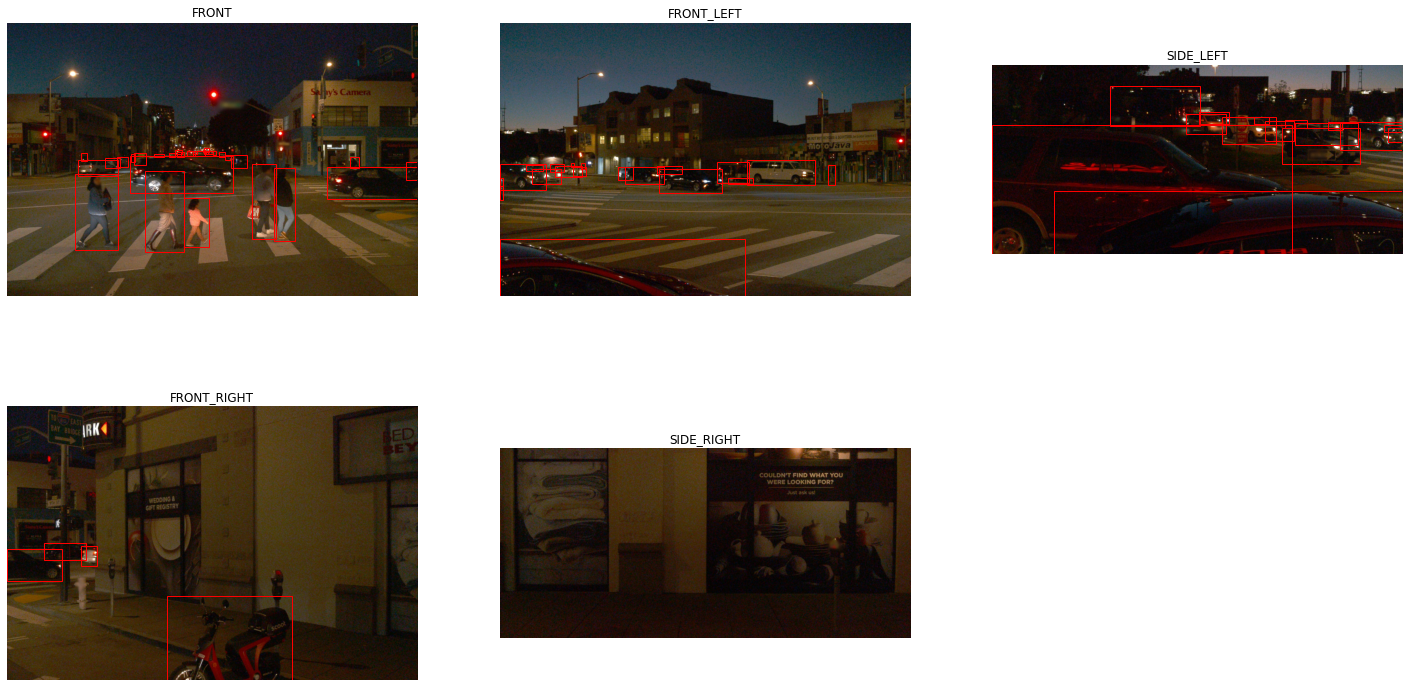

In [5]:
def show_camera_image(camera_image, camera_labels, layout, cmap=None):
  """Show a camera image and the given camera labels."""

  ax = plt.subplot(*layout)

  # Draw the camera labels.
  for camera_labels in frame.camera_labels:
    # Ignore camera labels that do not correspond to this camera.
    if camera_labels.name != camera_image.name:
      continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
      # Draw the object bounding box.
      ax.add_patch(patches.Rectangle(
        xy=(label.box.center_x - 0.5 * label.box.length,
            label.box.center_y - 0.5 * label.box.width),
        width=label.box.length,
        height=label.box.width,
        linewidth=1,
        edgecolor='red',
        facecolor='none'))

  # Show the camera image.
  plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
  plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
  plt.grid(False)
  plt.axis('off')

plt.figure(figsize=(25, 20))

for index, image in enumerate(frame.images):
  show_camera_image(image, frame.camera_labels, [3, 3, index+1])

## Mask RCNN Model

- Use pretrained Mask RCNN model weights as base.
- Install weights from Mask RCNN model trained on COCO dataset.

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
 
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('/content/drive/My Drive/waymo/mask_rcnn_coco.h5', by_name=True)

## Evaluation

- Perform prediction and generate bounding box labels.
- Evalue average precision for each frame using a threshold for IOU.
- Find mean average precision for each class of sample.

In [0]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [80]:
results = []
for image in tqdm(images):
    results.append(rcnn.detect([image], verbose=0))

100%|██████████| 198/198 [01:37<00:00,  2.04it/s]


In [81]:
predictions = [res[0]['rois'].tolist() for res in results]
predictions

images = []
pred_images_frame = []

pred_label_frame = []
pred_labels = []
pred_xmin = []
pred_ymin = []
pred_xmax = []
pred_ymax = []
pred_label_name = []
pred_frame_id = 0

for res in tqdm(results):
  pred_labels = res[0]['rois'].tolist()
  pred_class = res[0]['class_ids'].tolist()
  for i,l in enumerate(pred_labels):
    y1, x1, y2, x2 = l[0], l[1], l[2], l[3]
    pred_xmin.append(x1)
    pred_ymin.append(y1)
    pred_xmax.append(x2)
    pred_ymax.append(y2)
    pred_label_frame.append(pred_frame_id)
    pred_label_name.append(pred_class[i])
  pred_frame_id += 1

100%|██████████| 198/198 [00:00<00:00, 54525.13it/s]


In [0]:
pred_df = pd.DataFrame({
    'label_frame': pred_label_frame,
    'xmin': pred_xmin,
    'ymin': pred_ymin,
    'xmax': pred_xmax,
    'ymax': pred_ymax,
    'label_name':pred_label_name}
)

In [0]:
df = pd.DataFrame({
    'label_frame': label_frame,
    'center_x': center_x,
    'center_y': center_y,
    'width': width,
    'length': length,
    'label_name':label_name}
)
df['xmin'] = df.center_x - (df.length*0.5)
df['ymin'] = df.center_y - (df.width*0.5)
df['xmax'] = df.center_x + (df.length*0.5)
df['ymax'] = df.center_y + (df.width*0.5)

In [0]:
from waymo_open_dataset import label_pb2

In [0]:
types = {1: 'vehicle', 4:'cyclist', 2: 'pedestrian', 3: 'sign', 0: 'unknown'}
coco_types = {1: 'pedestrian', 3:'vehicle', 6: 'vehicle', 10: 'sign',
              4: 'vehicle', 40: 'unknown', 12: 'sign'}


df[['label_frame', 'xmin', 'ymin', 'xmax', 'ymax', 'label_name']].replace(
    {'label_name':types}
).to_csv('waymo.csv', index=False)

pred_df.replace({'label_name': coco_types}).to_csv('mrcnn.csv', index=False)

In [31]:
# predictions = [res[0]['rois'].tolist() for res in results]

ground_truths = []
for lb in labels:
    boxes = []
    for box in lb.labels:
        label = box.box
        x0 = label.center_x - (label.width/2)
        x1 = label.center_x + (label.width/2)
        y0 = label.center_y - (label.length/2)
        y1 = label.center_y + (label.length/2)

        boxes.append([y0, x0, y1, x1])
    ground_truths.append(boxes)
    
len(ground_truths)

198

In [0]:
predict_flags = []
precisions = []
for i, boxes in enumerate(ground_truths[:25]):
    predict_flag = [0]*len(boxes)
    for j, box in enumerate(boxes):
        results_check = []
        for prediction in predictions[i]:
            iou = bb_intersection_over_union(box, prediction)
            if iou > 0.5:
                results_check.append(iou)
        if results_check and max(results_check) > 0.5:
            predict_flag[j] = 1
    predict_flags.append(predict_flag)
    precisions.append(np.mean(predict_flag))

In [0]:
np.mean(precisions)

0.2187965367965368

In [0]:
plt.figure(figsize=(25, 20))
draw_image_with_boxes(images[30], ground_truths[30])

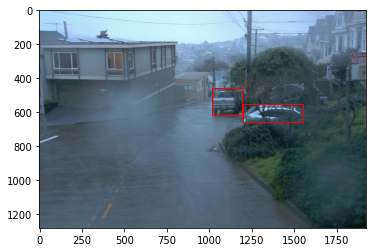

In [0]:
# visualize the results
draw_image_with_boxes(images[0], results[0][0]['rois'])

## SVM Model

Object detection using histogram of oriented gradients (HOG) and support vector machines (SVM)

In [0]:
with open('/content/drive/My Drive/waymo/svm.model', 'rb') as f:
  d = pickle.load(f, encoding='latin1') 

In [0]:
import numpy as np 
#from skimage import transform
#from skimage.transform import pyramid_gaussian
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
from sklearn.externals import joblib
import cv2
#from config import *
from skimage import color
import matplotlib.pyplot as plt 
import os 
import glob
import pickle

min_wdw_sz = [64, 128]
step_size = [10,10]
orientations = 9
pixels_per_cell = [6,6]
cells_per_block = [2, 2]
visualize = False
normalize = True
threshold = .3
 

def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input 'image' of size 
    equal to 'window_size'. The first image returned top-left 
    co-ordinate (0, 0) and are increment in both x and y directions
    by the 'step_size' supplied.
    So, the input parameters are-
    image - Input image
    window_size - Size of Sliding Window 
    step_size - incremented Size of Window
    The function returns a tuple -
    (x, y, im_window)
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y: y + window_size[1], x: x + window_size[0]])

def detector(im):
#     im = cv2.imread(filename)
    im = imutils.resize(im, width = min(400, im.shape[1]))
    min_wdw_sz = (64, 128)
    step_size = (10, 10)
    downscale = 1.6
   
    clf = d

    #List to store the detections
    detections = []
    #The current scale of the image 
    scale = 0

    for im_scaled in pyramid_gaussian(im, downscale = downscale):
        #The list contains detections at the current scale
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
#             im_window = color.rgb2gray(im_window)
            fd =  hog(im_window, orientations=9, pixels_per_cell=(6, 6),cells_per_block=(2, 2),block_norm='L1',transform_sqrt=False,feature_vector=True)
            fd = fd.reshape(1, -1)
            pred = clf.predict(fd)

            if pred == 1:
                
                if clf.decision_function(fd) > 0.5:
                    detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), clf.decision_function(fd), int(min_wdw_sz[0] * (downscale**scale)),int(min_wdw_sz[1] * (downscale**scale))))
                 

            
        scale += 1

    clone = im.copy()



    rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
    sc = [score[0] for (x, y, score, w, h) in detections]
    print ("sc: ", sc)
    sc = np.array(sc)
    pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.3)
    #print ("shape, ", pick.shape)
   
    for (x_tl, y_tl, _, w, h) in detections:
        cv2.rectangle(im, (x_tl, y_tl), (x_tl + w, y_tl + h), (0, 255, 0), thickness = 2)
    for(xA, yA, xB, yB) in pick:
        cv2.rectangle(clone, (xA, yA), (xB, yB), (0, 255, 0), 2)
    
    plt.axis("off")
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title("Raw Detection before NMS")
    plt.show()

    plt.axis("off")
    plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
    plt.title("Final Detections after applying NMS")
    plt.show()
    
    return yA,xA, yB, xB

def test_folder(foldername):

    filenames = glob.glob(os.path.join(foldername, '*'))
    for filename in filenames:
        detector(filename)

In [0]:
boxes = []
for i in range(25):
    box=[0,0,0,0]
    try:
        box = detector(images[i])
        boxes.append([list(box)])
    except:
        boxes.append([box])
        continue

In [0]:
plt.imshow(images[11])

In [0]:
detector(images[11])

In [0]:
svm_boxes = boxes

predict_flags = []
precisions = []
for i, boxes in enumerate(ground_truths[:25]):
    predict_flag = [0]*len(boxes)
    for j, box in enumerate(boxes):
        results = []
        for prediction in svm_boxes:
            iou = bb_intersection_over_union(box, prediction)
            if iou > 0.5:
                results.append(iou)
        if results and max(results) > 0.5:
            predict_flag[j] = 1
    predict_flags.append(predict_flag)
    precisions.append(np.mean(predict_flag))
    
np.mean(precisions)

### Keras - Retinanet

- Retina net model with frozen layers from MS COCO dataset
- Fine tuned on Waymo dataset.

In [0]:
!git clone https://github.com/fizyr/keras-retinanet

In [0]:
!cd keras-retinanet && pip install .

In [0]:
!retinanet-train --weights '/content/drive/My Drive/waymo/resnet50_coco_best_v2.1.0.h5' --epochs 1 --freeze-backbone --snapshot-path model csv /mrcnn_output.csv /classes.csv

In [0]:
!cp '/content/drive/My Drive/waymo/retinanet/classes.csv' /classes.csv

In [0]:
!cp '/content/drive/My Drive/waymo/retinanet/mrcnn_output.csv' /mrcnn_output.csv

In [0]:
!cp -r '/content/drive/My Drive/waymo/retinanet/waymo_images' /waymo_images

In [0]:
import cv2
!zip -r /content/waymo_images_1.zip /content/waymo_images_1
for i,image in enumerate(images):
  print(i)
  cv2.imwrite('/content/waymo_images_1/{0}.jpg'.format(i), image)

In [0]:
from keras_retinanet import models

In [0]:
model_path = '/content/model/resnet50_csv_01_inference.h5'

In [0]:
!retinanet-convert-model '/content/model/resnet50_csv_01.h5' '/content/model/resnet50_csv_01_inference.h5'

In [0]:
model = models.load_model(model_path, backbone_name='resnet50')

In [0]:
images[0]

In [0]:
boxes, scores, labels = model.predict_on_batch(np.expand_dims(images[:25], axis=0))

In [54]:
predictions = []
for image in images[:25]:
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(np.array(image), axis=0))
  box_actual = []
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    # print(box)
    if score < 0.5:
        break
    box_actual.append(box)
  print(len(box_actual))
  predictions.append(box_actual)



8
11
11
11
14
11
12
13
15
15
10
11
11
14
10
17
11
10
11
13
12
15
13
10
13


In [55]:
print(len(predictions))

25


In [59]:
predict_flags = []
precisions = []
for i, boxes in enumerate(ground_truths[:25]):
    predict_flag = [0]*len(boxes)
    for j, box in enumerate(boxes):
        results_check = []
        for prediction in predictions[i]:
            print(len(prediction))
            iou = bb_intersection_over_union(box, prediction)
            if iou > 0.2:
                results_check.append(iou)
        if results_check and max(results_check) > 0.5:
            predict_flag[j] = 1
    predict_flags.append(predict_flag)
    precisions.append(np.mean(predict_flag))

Streaming output truncated to the last 5000 lines.
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4

In [61]:
np.mean(precisions)

0.005918003565062388

In [60]:
precisions

[0.0,
 0.0,
 0.0,
 0.0,
 0.030303030303030304,
 0.0,
 0.0,
 0.0,
 0.0,
 0.029411764705882353,
 0.0,
 0.058823529411764705,
 0.0,
 0.029411764705882353,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]